In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

In [36]:
def sum_of_sinusoids_jakes(fd, N, signal_length):
    # Number of sinusoids (sum of sinusoids model)
    M = 2 * N
    
    # Generate random phases and Doppler shifts
    phases = np.random.uniform(0, 2 * np.pi, M)
    theta_m = (2 * np.pi * np.arange(1, N + 1)) / M
    doppler_shifts = fd * np.cos(theta_m)
    
    # Generate time vector
    t = np.arange(0, signal_length) / (2 * fd)
    
    # Generate the Jakes spectrum using sum of sinusoids
    sum_sinusoids = np.zeros(signal_length)
    for i in range(N):
        sum_sinusoids += np.cos(2 * np.pi * doppler_shifts[i] * t + phases[i])
    
    # Normalize the result
    sum_sinusoids *= np.sqrt(2.0 / M)
    
    return sum_sinusoids

# Generate Rayleigh envelope using the sum of sinusoids Jakes model
def generate_rayleigh_envelope(signal_length, velocity, carrier_frequency):
    c = 3e8  # Speed of light in m/s
    fd = velocity * carrier_frequency / c
    N = 16  # Number of sinusoids in the sum of sinusoids model
    rayleigh_envelope = sum_of_sinusoids_jakes(fd, N, signal_length)
    return rayleigh_envelope



In [38]:
# Example usage
signal_length = 100
velocity = 1.3  # m/s
carrier_frequency = 2.3e9  # Hz
rayleigh_envelope = generate_rayleigh_envelope(signal_length, velocity, carrier_frequency)

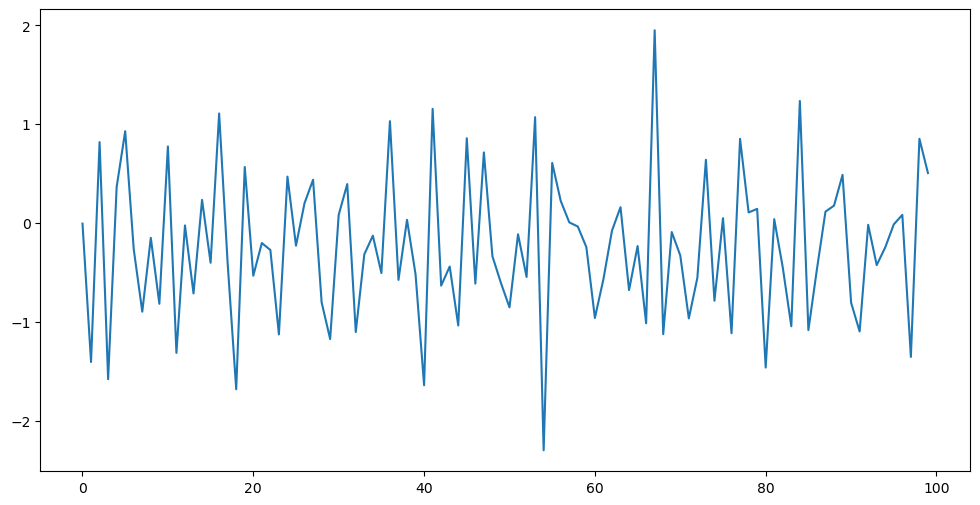

In [40]:
plt.figure(figsize = (12,6))
plt.plot(rayleigh_envelope)

In [52]:
def Jakes_filter(f_max, Ts, N):
    L = N // 2
    n = np.arange(1, L + 1)
    J_pos = special.jv(0.25, 2 * np.pi * f_max * n * Ts) / (n ** 0.25)
    J_neg = np.flip(J_pos)
    J_0 = 1.468813 * (f_max * Ts) ** 0.25
    J = np.concatenate((J_neg, [J_0], J_pos))
    n = np.arange(0, N + 1)
    hamm = 0.54 - 0.46 * np.cos(2 * np.pi * n / N)
    hw = J * hamm
    hw = hw / np.sqrt(np.sum(np.abs(hw) ** 2))
    return hw

# Generate Rayleigh envelope
def generate_rayleigh_envelope_old(signal_length, velocity, carrier_frequency):
    c = 3e8  # Speed of light in m/s
    fd = velocity * carrier_frequency / c
    Fs = 10000  # Sampling frequency
    N = 512
    Ts = 1 / Fs
    h = Jakes_filter(fd, Ts, N)
    x = np.random.randn(signal_length)
    y = np.convolve(x, h, 'valid')
    return y


In [58]:
rayleigh_envelope_old = generate_rayleigh_envelope_old(100, 1.3, 2.3e9)

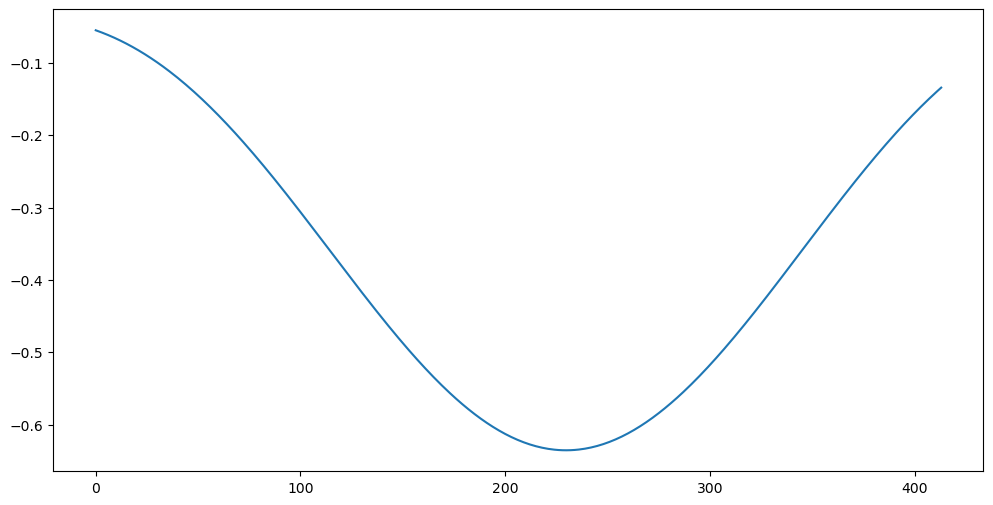

In [60]:
plt.figure(figsize = (12,6))
plt.plot(rayleigh_envelope_old)